# **Employee Attrition Prediction**

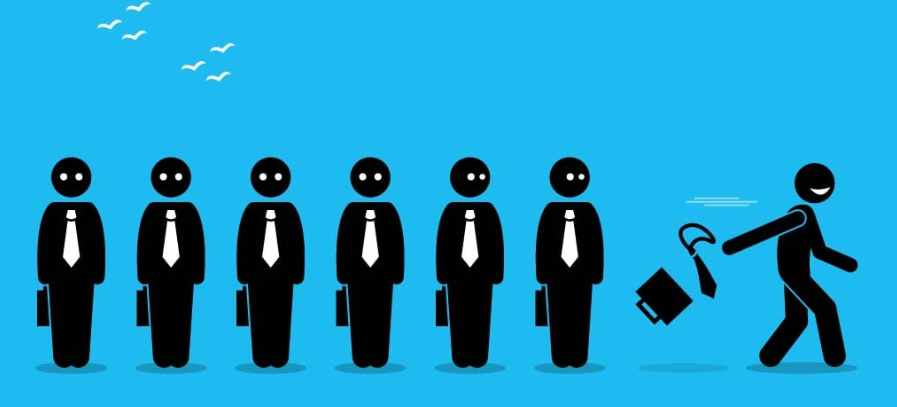

**Here's a clear explanation of the dataset columns**

* **Education**
  * Type: Ordinal (Integer: 1 to 5)
  * Meaning:
    * 1 - Below College
    * 2 - College
    * 3 - Bachelor
    * 4 - Master
    * 5 - Doctor

* **EnvironmentSatisfaction:** Reflects how satisfied an employee is with their work environment (facilities, culture, infrastructure). Low satisfaction can be a driver for attrition.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning:
    * 1 - Low
    * 2 - Medium
    * 3 - High
    * 4 - Ver High

* **JobInvolvement:** Indicates how engaged or emotionally invested an employee is in their job.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning:
    * 1 - Low
    * 2 - Medium
    * 3 - High
    * 4 - Ver High

* **PerformanceRating:** This rating is often skewed toward high values in this dataset, meaning most employees are rated highly.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning:
    * 1 - Low
    * 2 - Medium
    * 3 - High
    * 4 - Ver High

* **RelationshipSatisfaction:** Reflects satisfaction with colleague relationships or team dynamics. Lower scores may suggest internal conflicts or dissatisfaction.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning:
    * 1 - Low
    * 2 - Medium
    * 3 - High
    * 4 - Ver High
  
* **TrainingTimesLastYear:** Can indicate how well the employee is being upskilled. Both too little or excessive training can impact attrition.
  * Type: Ordinal (Integer: 0 to ~6)
  * Meaning:
    * Number of times the employee received training in the last year.
    
* **WorkLifeBalance:** Captures employee sentiment toward balancing personal and professional life. A major factor in retaining talent.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning:
    * 1 - Low
    * 2 - Medium
    * 3 - High
    * 4 - Ver High




## **1. Data Loading & Cleaning**

### **1.1 Load and read the dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/FSDS @Kodi Senapati/Colab files/MachineLearning/Projects/Datasets/HR-Employee-Attrition.csv")

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### **1.2 Drop constant columns**

In [3]:
one_col=[i for i in df.columns if df[i].nunique()==1]
for i in one_col:
  print(i)

EmployeeCount
Over18
StandardHours


**- Data Cleaning (Removing irrelevant or redundant columns)**

* Drop EmployeeCount, StandardHours and Over18 (same for all, no use).
* Drop EmployeeNumber (unique identifier, not useful for modeling).

In [4]:
#Finding the columns that has only 1 value all over the data

df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### **1.3 Check for Null Values and handle them if any**

In [5]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [6]:
df.drop_duplicates(inplace=True)

### **1.4 Basic data statistics**

In [7]:
# Checking whether the value matches the datatype

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [8]:
print(df.to_string(index=False))

 Age Attrition    BusinessTravel  DailyRate             Department  DistanceFromHome  Education   EducationField  EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel                   JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
  41       Yes     Travel_Rarely       1102                  Sales                 1          2    Life Sciences                        2 Female          94               3         2           Sales Executive                4        Single           5993        19479                   8      Yes                 11                  3                         1                 0                  8                      0                1               6                   4      

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## **2. Exploratory Data Analysis (EDA)**

### **2.1 Data Storytelling**

In [10]:
# Total Employees
total_employees=df.shape[0]
print(f"Total Employees:{total_employees}")

#Attrition Rate
attrition_rate=df[df['Attrition']=='Yes'].shape[0]
print(f'Attrition Rate:{attrition_rate}')

#Average Age
avg_age=df['Age'].mean()
print(f"Average Age:{avg_age:.0f}")

#Average Monthly Income
avg_mon_inc=df['MonthlyIncome'].mean()
print(f"Average Monthly Income:{avg_mon_inc:.2f}")

#Average Years at Company
avg_yrs_com=df['YearsAtCompany'].mean()
print(f"Average Years At Company:{avg_yrs_com:.2f}")

Total Employees:1470
Attrition Rate:237
Average Age:37
Average Monthly Income:6502.93
Average Years At Company:7.01


In [11]:
print(f'''Our organization has {total_employees} employees.
Out of them, {attrition_rate} employees have left the company, indicating potential retention issues.
The average employee is {avg_age:.0f} years old, earns around ₹{avg_mon_inc:.0f}, and stays for about {avg_yrs_com:.1f} years.
''')

Our organization has 1470 employees.
Out of them, 237 employees have left the company, indicating potential retention issues.
The average employee is 37 years old, earns around ₹6503, and stays for about 7.0 years.



In [12]:
# Find Categorical & Numerical values

categorical_col = df.select_dtypes(include=['object']).columns.tolist()
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_col)
print(len(categorical_col))
print("Numerical Columns:", numerical_col)
print(len(numerical_col))

Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
8
Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
23


**- Attrition vs numerical features**

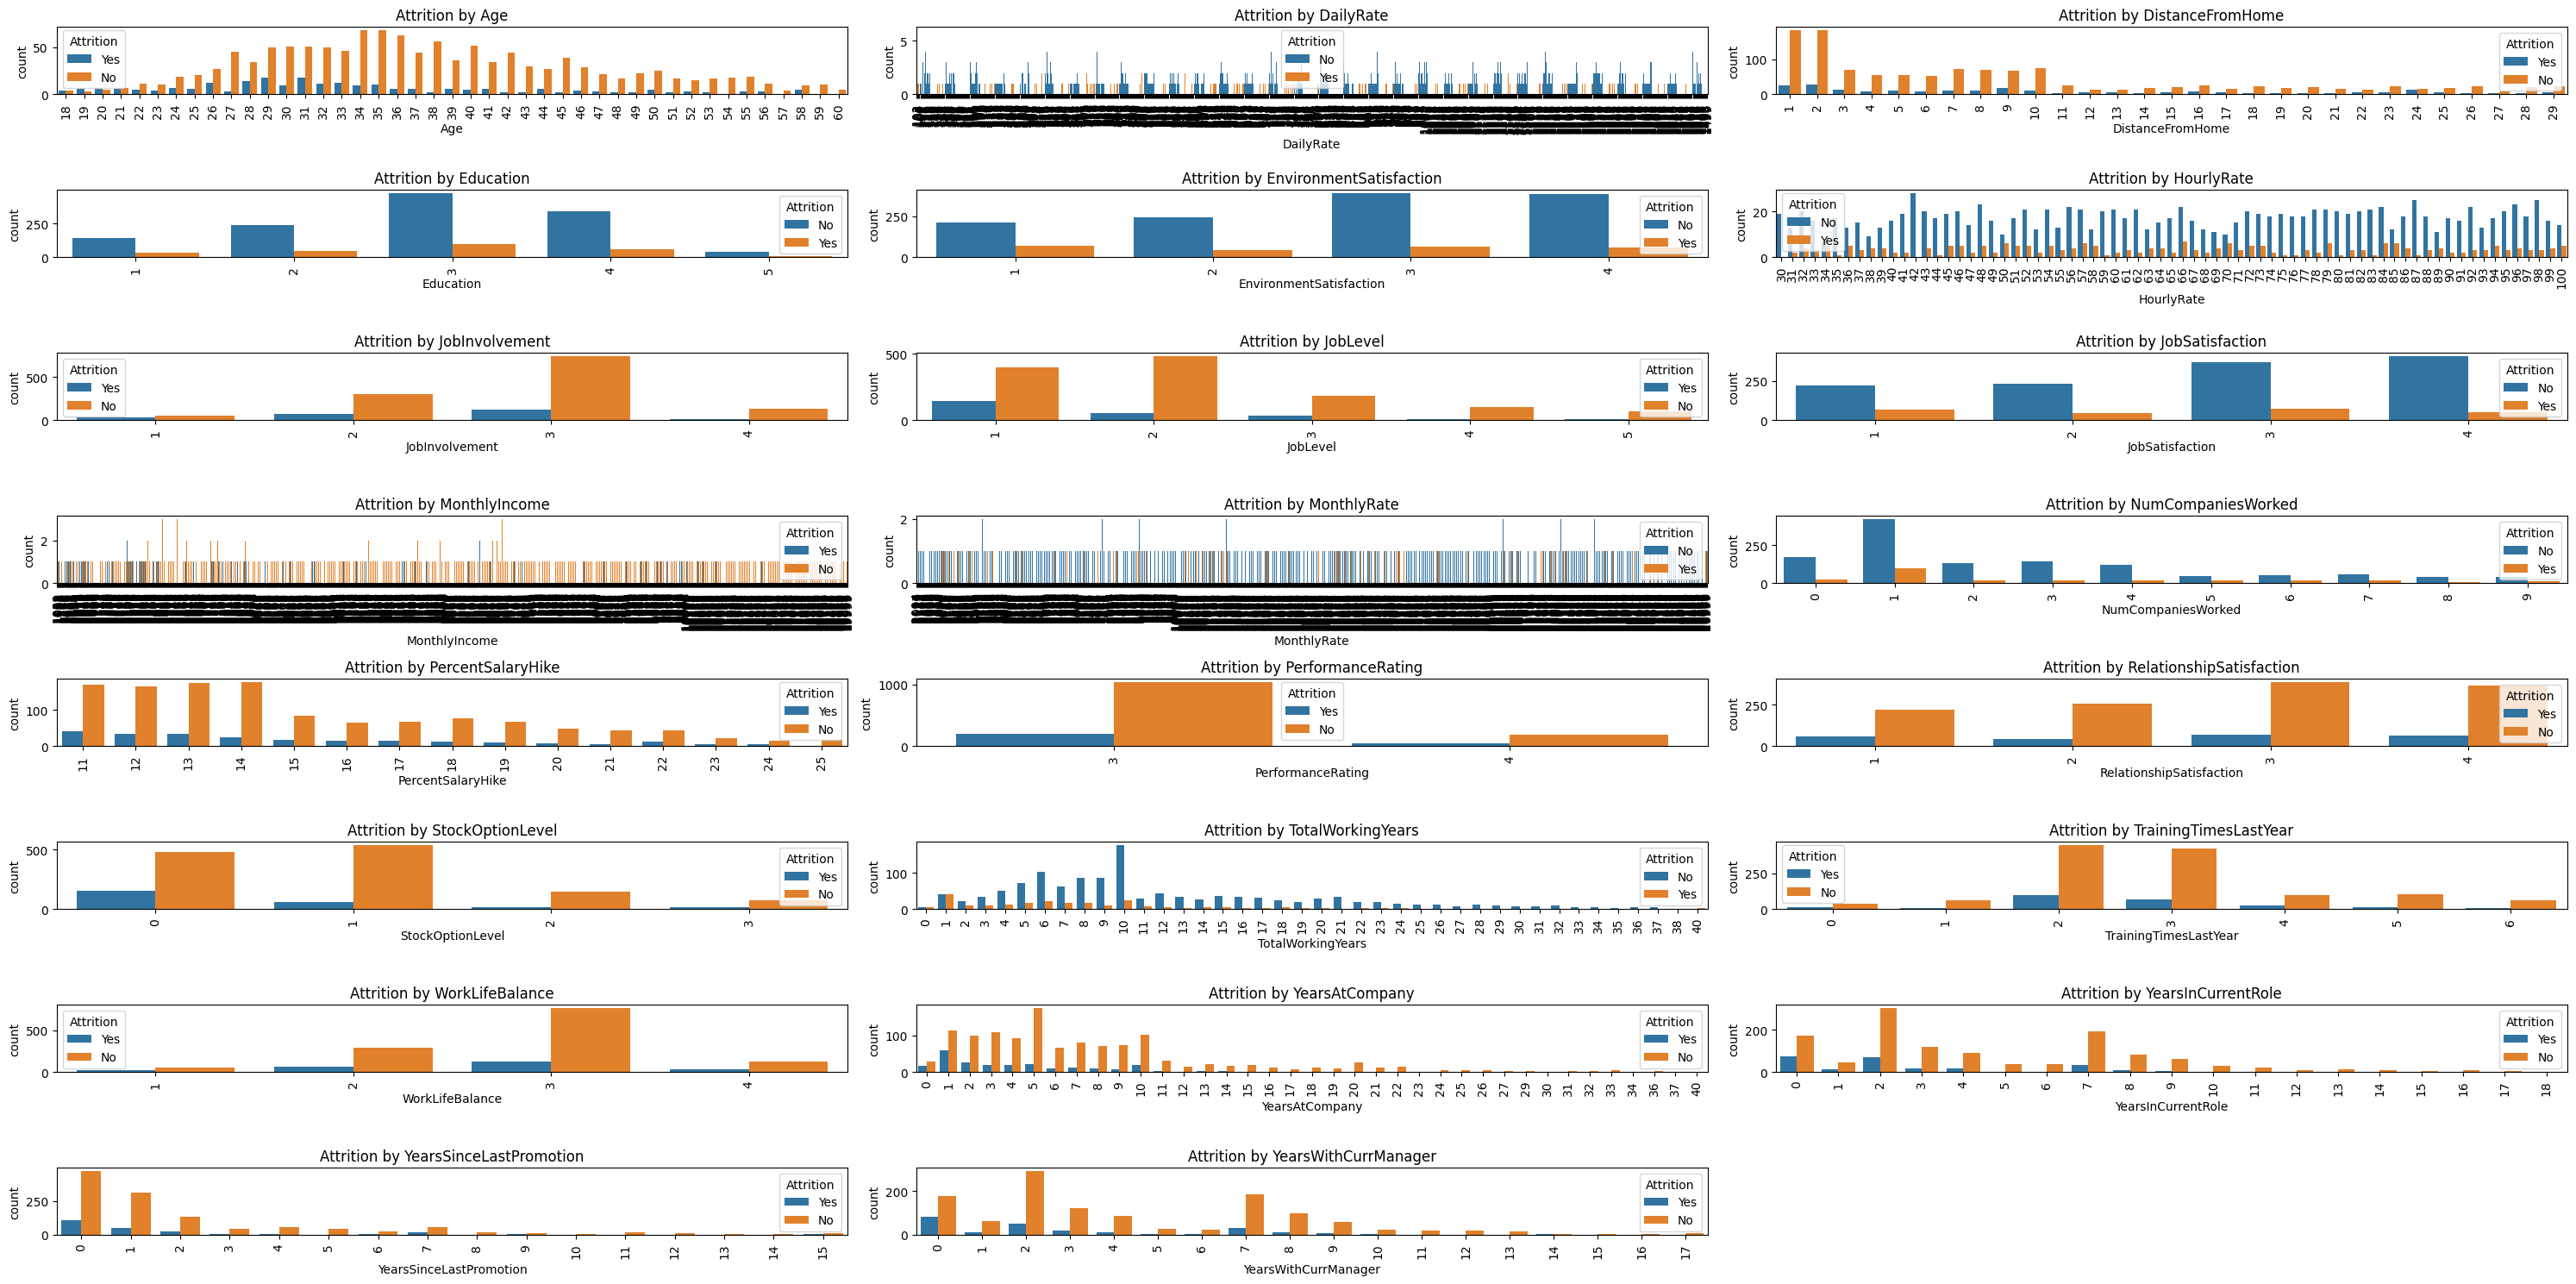

In [ ]:
import math

n_cols=3
n_rows=math.ceil(len(numerical_col)/n_cols)

plt.figure(figsize=(30, 15))
for i, col in enumerate(numerical_col, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.countplot(data=df, x=col, hue='Attrition')
  plt.title(f'Attrition by {col}')
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**- Attrition vs Categorical Features**

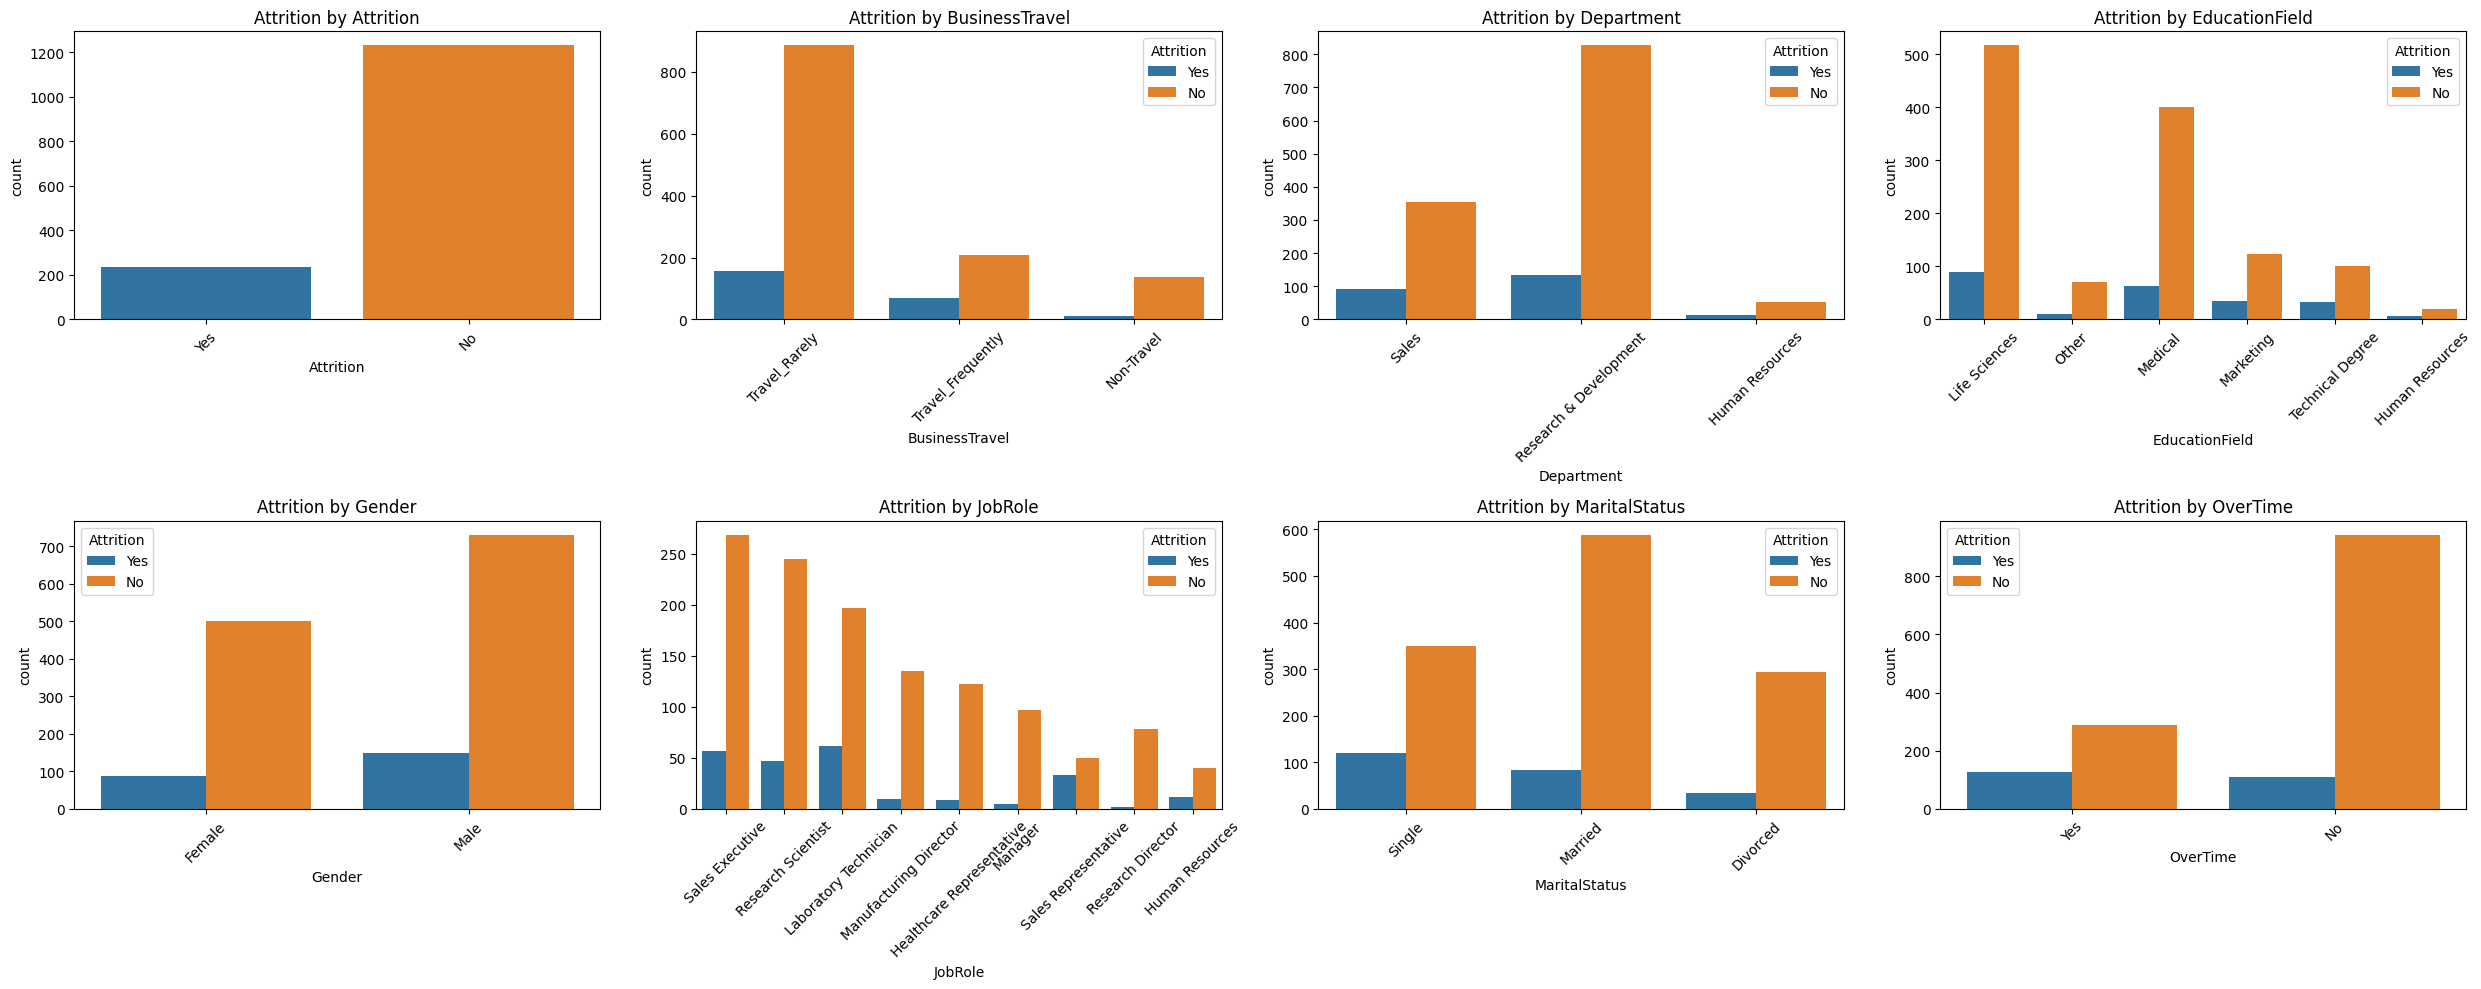

In [ ]:
n_cols=4
n_rows=math.ceil(len(categorical_col)/n_cols)

plt.figure(figsize=(25, 10))
for i, col in enumerate(categorical_col, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.countplot(data=df, x=col, hue='Attrition')
  plt.title(f'Attrition by {col}')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **2.2 Distribution Analysis**

**Numerical Feature**

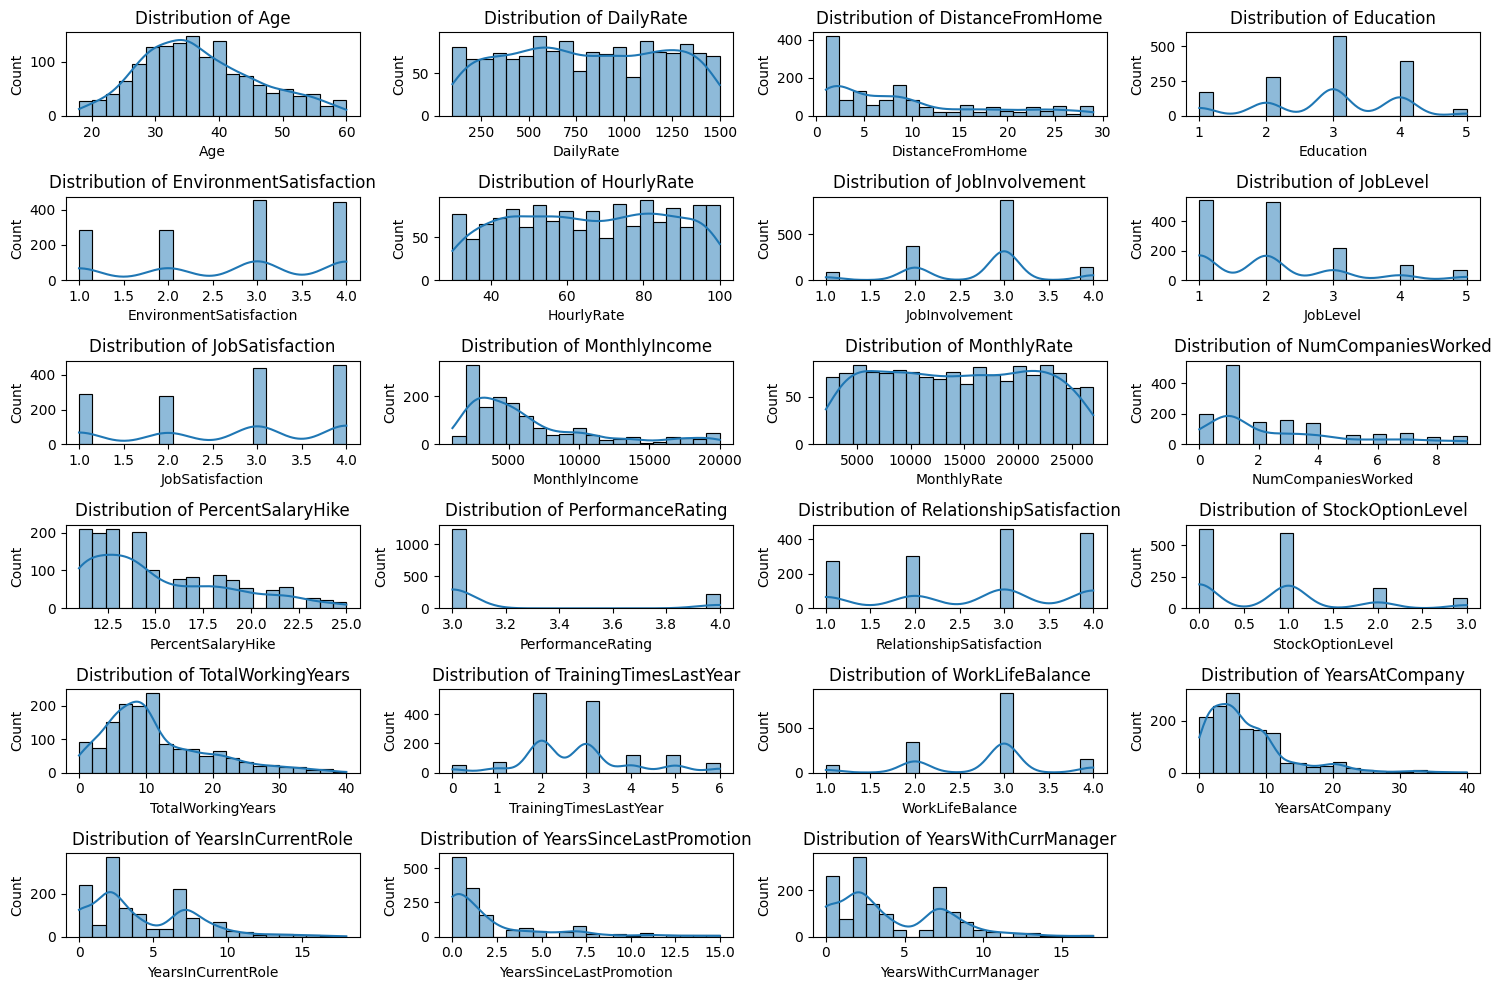

In [13]:
import math

n_cols=4
n_rows=math.ceil(len(numerical_col)/n_cols)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_col, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# **3. Feature Engineering**

### **3.1 Encode Categorical Variables**

In [14]:
for i in categorical_col:
  print(f"{i} has: {df[i].nunique()} values")
  print(f"Unique values: {df[i].unique()}")
  print("-"*40)

Attrition has: 2 values
Unique values: ['Yes' 'No']
----------------------------------------
BusinessTravel has: 3 values
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Department has: 3 values
Unique values: ['Sales' 'Research & Development' 'Human Resources']
----------------------------------------
EducationField has: 6 values
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------------
Gender has: 2 values
Unique values: ['Female' 'Male']
----------------------------------------
JobRole has: 9 values
Unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------------
MaritalStatus has: 3 values
Unique values: ['Single' 'Married' 'Divorced']
---------------------------

In [15]:
from sklearn.preprocessing import LabelEncoder

def categorical_to_numerical(df, binary_col, multi_col):
  # Create a copy to avoid modifying the original DataFrame
  dft=df.copy()

  # Label Encoding for Binary columns
  for col in binary_col:
    le=LabelEncoder()
    dft[col]=le.fit_transform(dft[col])

  # One-Hot Encoding
  dft=pd.get_dummies(dft, columns=multi_col, dtype=int, drop_first=True)

  return dft

In [16]:
binary_col=['Attrition', 'Gender', 'OverTime']
multi_col=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

dft=categorical_to_numerical(df, binary_col, multi_col)
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

### **3.2 Correlation Analysis**

Identify & Remove Highly correlated features if required (Correlation Heatmap)

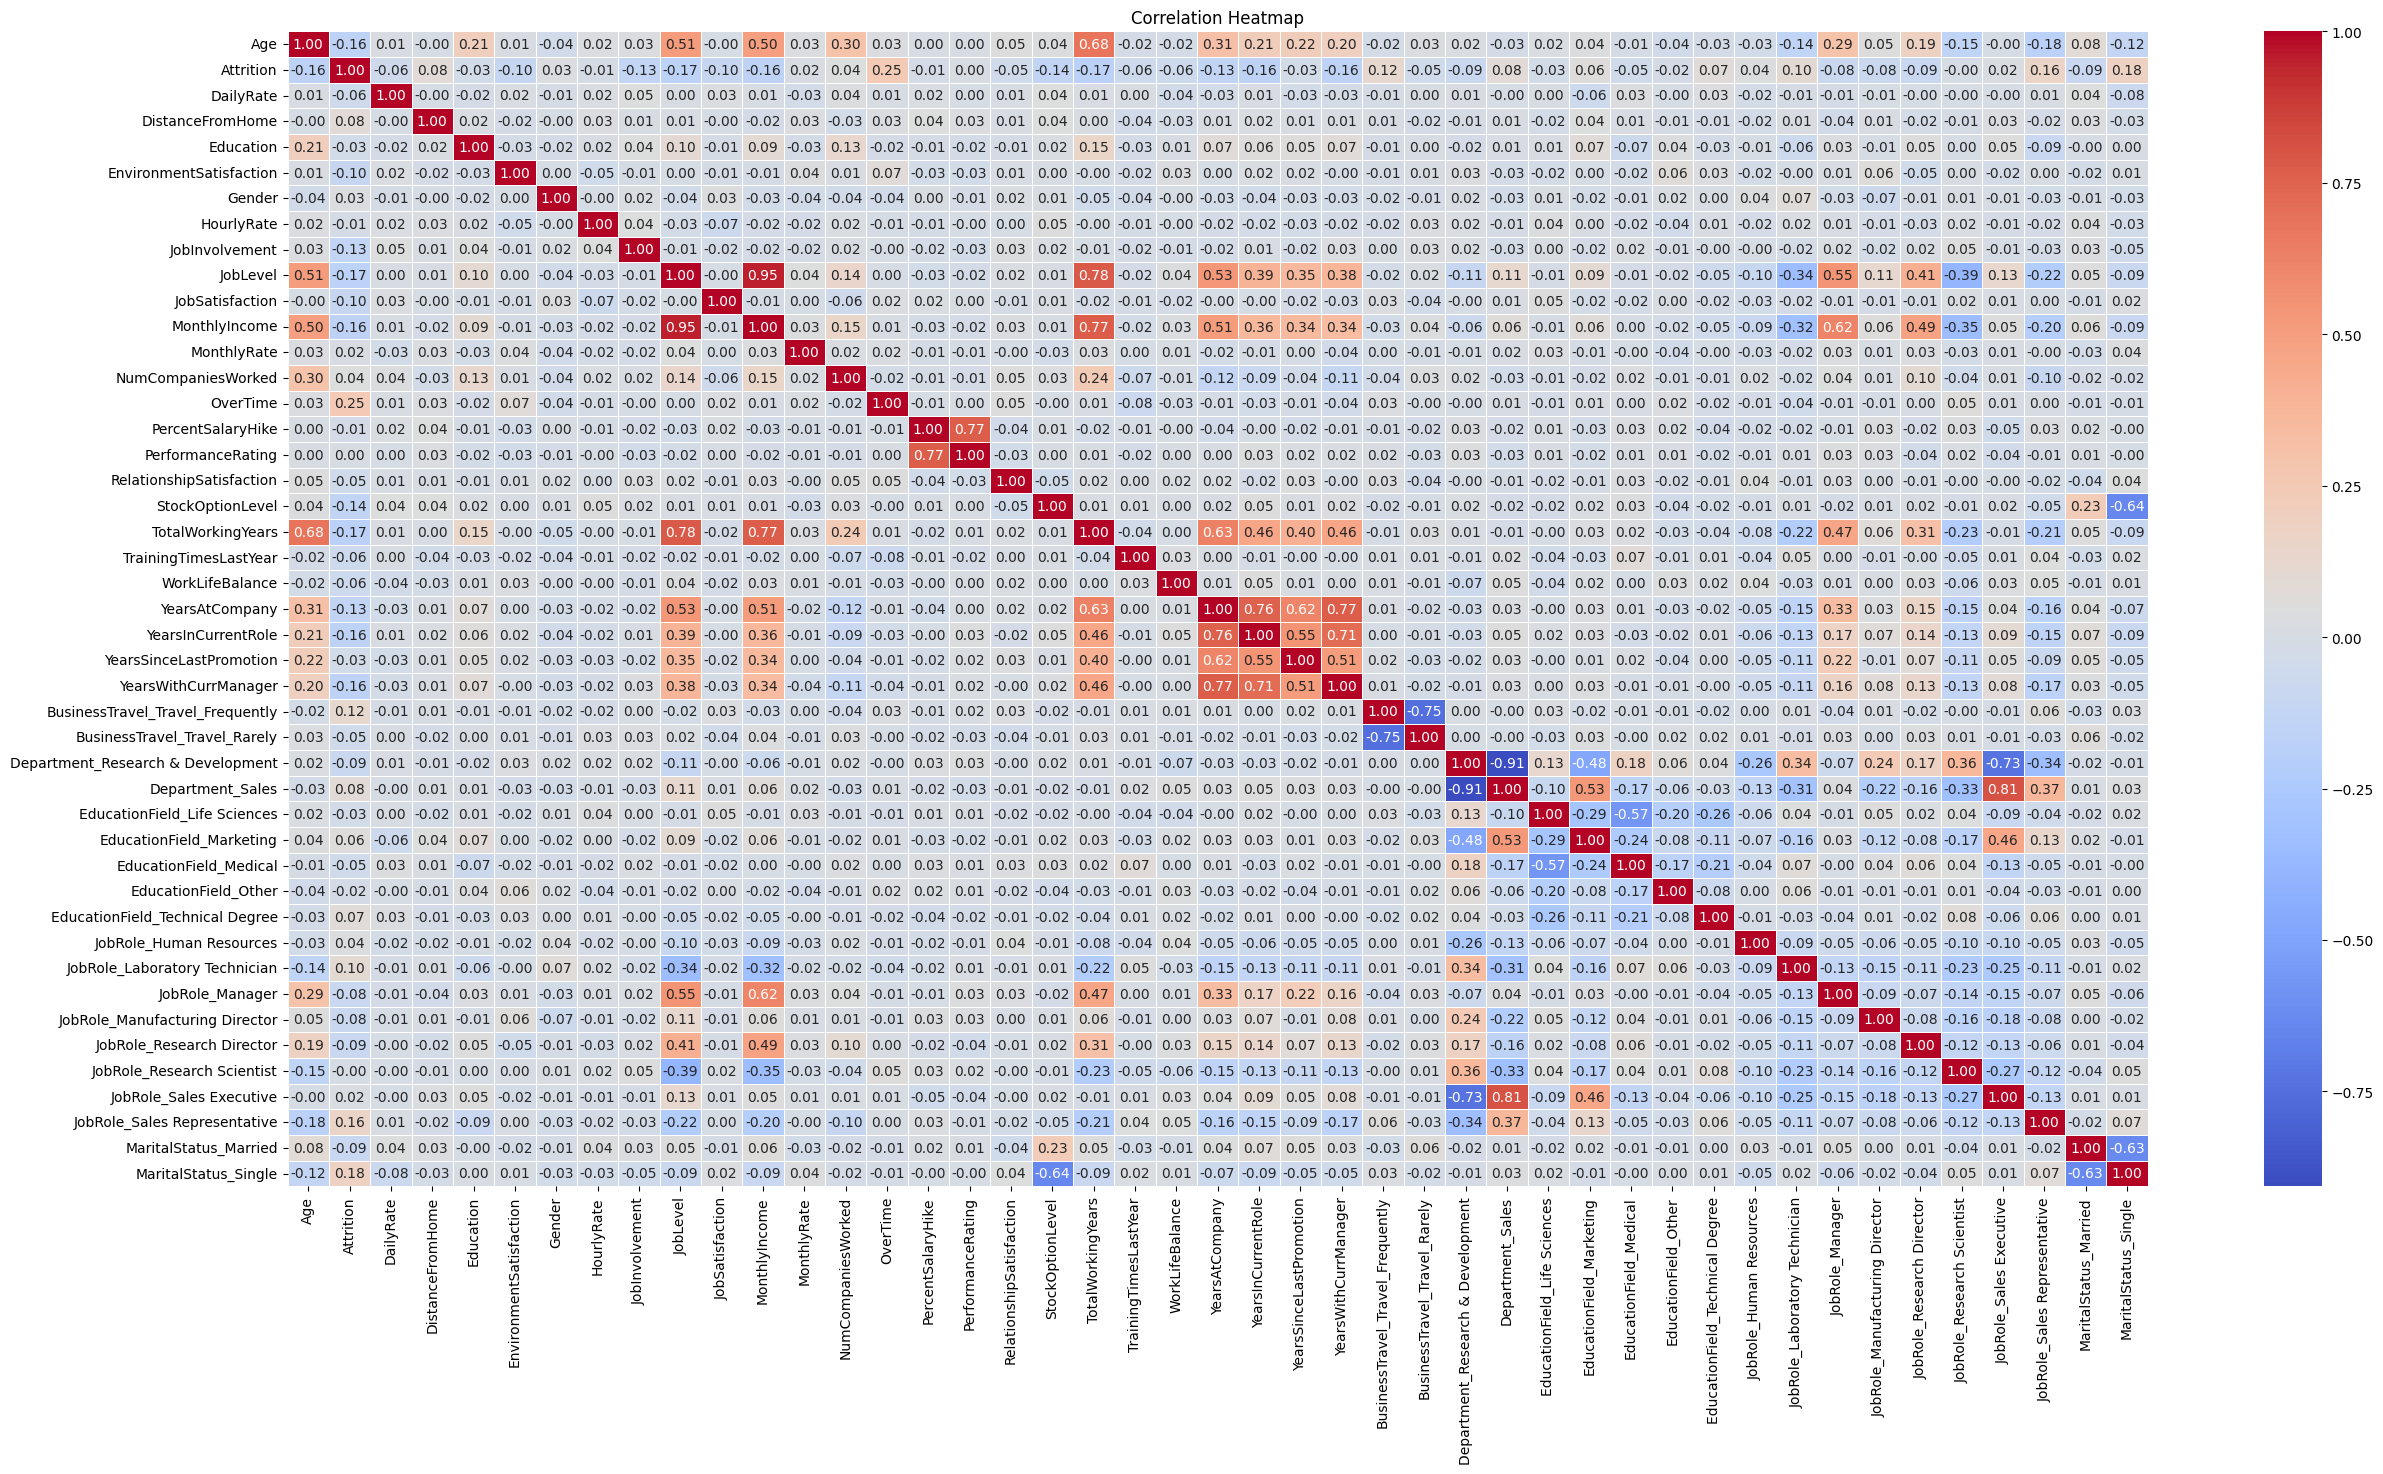

In [17]:
plt.figure(figsize=(30, 15))
sns.heatmap(dft.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Above we can see visually, but below we automate the process to find the variables to remove as the correlation is same**

In [18]:
df_corr=dft.corr()

# Set the threshold of high correlation
threshold=0.9

#Iterate through out the upper traingle of the correlation matrix
for i in range(len(df_corr.columns)):
  for j in range(i):
    if df_corr.iloc[i,j]>=threshold:
      col1=df_corr.columns[i]
      col2=df_corr.columns[j]
      print(f"{col1} -> {col2}: {df_corr.iloc[i,j]:.2f}")


MonthlyIncome -> JobLevel: 0.95


**MonthlyIncome ↔ JobLevel: 0.95**
* Logically, drop MonthlyIncome since it's usually derieved from JobLevel and other factors.


In [19]:
print(f'Shape of datasets before dropping:{df.shape}')
df.drop(['MonthlyIncome'], axis=1, inplace=True)
print(f'Shape of datasets after dropping:{df.shape}')


Shape of datasets before dropping:(1470, 31)
Shape of datasets after dropping:(1470, 30)


# **4. Handling Class imbalance**

Check Data Imbalance**

* If Imbalance exists, consider using SMOTE, Class Weights, or Undersampling/
Oversampling

In [22]:
from collections import Counter

class_counts=Counter(dft['Attrition'])
print("Class distribution:", class_counts)

Class distribution: Counter({0: 1233, 1: 237})


In [24]:
# As Data is Imbalanced, need to apply SMOTE for Balancing

from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target variable
X=dft.drop(columns=['Attrition']) #Feature
y=dft['Attrition'] #Target

#Display original class distribution
print("Original Class Distribution:", Counter(y))

#Apply SMOTE
smote=SMOTE(sampling_strategy=1, random_state=42)
X_re, y_re=smote.fit_resample(X,y)

#Display new class distribution
print("New Class Distribution:", Counter(y_re))

#Convert back to DataFrame
dft=pd.DataFrame(X_re, columns=X.columns)
dft['Attrition']=y_re


Original Class Distribution: Counter({0: 1233, 1: 237})
New Class Distribution: Counter({1: 1233, 0: 1233})


# **5. Data Scaling & Splitting**

### **5.1 Standardization**

* find which columns needed to standardize

In [25]:
print(dft.describe().T)

                                    count          mean          std     min  \
Age                                2466.0     35.482157     8.962118    18.0   
DailyRate                          2466.0    780.489862   377.859947   102.0   
DistanceFromHome                   2466.0      9.797648     7.721313     1.0   
Education                          2466.0      2.737632     0.971239     1.0   
EnvironmentSatisfaction            2466.0      2.495539     1.062824     1.0   
Gender                             2466.0      0.507299     0.500048     0.0   
HourlyRate                         2466.0     65.738037    19.161730    30.0   
JobInvolvement                     2466.0      2.537307     0.723712     1.0   
JobLevel                           2466.0      1.845499     1.029018     1.0   
JobSatisfaction                    2466.0      2.459448     1.078359     1.0   
MonthlyIncome                      2466.0   5770.431468  4275.753258  1009.0   
MonthlyRate                        2466.

In [27]:
to_standardize=[]
for i in dft.columns:
  stats=dft[i].describe()
  if stats['std'] > 3.5:
    to_standardize.append(i)

print("Recommended for Standardization:", to_standardize)
print(len(to_standardize))

Recommended for Standardization: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
8


In [28]:
# Standardize columns that needs to be standardized

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dft[to_standardize]=scaler.fit_transform(dft[to_standardize])

In [29]:
dft.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2466.0,-3.111866e-16,1.000203,-1.951068,-0.723431,-0.165414,0.615810,2.736275
DailyRate,2466.0,-6.915258e-17,1.000203,-1.795976,-0.831799,-0.056884,0.837809,1.901911
DistanceFromHome,2466.0,-1.037289e-16,1.000203,-1.139629,-0.880553,-0.232864,0.673902,2.487433
Education,2466.0,2.737632e+00,0.971239,1.000000,2.000000,3.000000,3.000000,5.000000
EnvironmentSatisfaction,2466.0,2.495539e+00,1.062824,1.000000,2.000000,3.000000,3.000000,4.000000
Gender,2466.0,5.072993e-01,0.500048,0.000000,0.000000,1.000000,1.000000,1.000000
HourlyRate,2466.0,3.263137e-16,1.000203,-1.865452,-0.821493,0.013674,0.848841,1.788404
JobInvolvement,2466.0,2.537307e+00,0.723712,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,2466.0,1.845499e+00,1.029018,1.000000,1.000000,2.000000,2.000000,5.000000
JobSatisfaction,2466.0,2.459448e+00,1.078359,1.000000,1.000000,3.000000,3.000000,4.000000


## **6. Model Building & Evaluation**

### **6.1 Test Train split**

In [30]:
# Load the dataset (assuming df_re is preprocessed)
X = dft.drop(columns=["Attrition"])  # Features
y = dft["Attrition"]  # Target Variable

# Split to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

### **6.2 Apply Multiple Classification Algorithms**

In [31]:
# Import Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc


#Define Models
models={
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

results={}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1] #Probabilities for ROC

  # Calculate metrics
  accuracy = accuracy_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_proba)
  report= classification_report(y_test, y_pred)

  # Store results
  results[name] = {
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
    }

  print(f"----------{name}-----------")
  print(f"Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")
  print(classification_report(y_test, y_pred))
  print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------Logistic Regression-----------
Accuracy: 0.9069 | ROC-AUC: 0.9569
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       247
           1       0.92      0.89      0.91       247

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



----------SVM-----------
Accuracy: 0.8725 | ROC-AUC: 0.9334
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       247
           1       0.90      0.84      0.87       247

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



----------Decision Tree-----------
Accuracy: 0.8462 | ROC-AUC: 0.8462
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       247
           1       0.83    

**Identify the Best Model**

In [32]:
#Convet results to DataFrame

results_df = pd.DataFrame(results).T
results_df['Composite_Score'] = results_df[['Accuracy', 'ROC-AUC']].mean(axis=1)


# Find the best model (highest composite of Accuracy and ROC-AUC)
best_model_name = results_df['Composite_Score'].idxmax()
best_model = models[best_model_name]

print("\n=== Model Performance Summary ===")
print(results_df.sort_values('Composite_Score', ascending=False))

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['Accuracy']:.4f}")
print(f"ROC-AUC: {results[best_model_name]['ROC-AUC']:.4f}")


=== Model Performance Summary ===
                     Accuracy   ROC-AUC  Composite_Score
Random Forest        0.927126  0.968201         0.947663
XGBoost              0.912955  0.973987         0.943471
Logistic Regression  0.906883  0.956908         0.931895
SVM                  0.872470  0.933354         0.902912
KNN                  0.809717  0.918668         0.864192
Decision Tree        0.846154  0.846154         0.846154

Best Model: Random Forest
Accuracy: 0.9271
ROC-AUC: 0.9682


### **6.3 Hypermater Tuning of Random Forest & XGBoost**

**Trying to finetune the RandomForest to check the accuracy**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf= {
    'n_estimators': [100, 200],  # Instead of [50, 100, 200, 300, 400, 500]
    'max_depth': [10, 20, None],  # Instead of range(5, 50, 5)
    'min_samples_split': [2, 5],  # Most common useful values
    'max_features': ['sqrt']      # Often works better than 'log2'
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search_rf.best_params_)

# Evaluate the best model
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

**Trying to finetune the XGBoost to check the accuracy**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "n_estimators": [100, 200, 300]
}
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Final Accuracy: 0.9089068825910931
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.95      0.86      0.90       247

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



# **7. Save the Model**